**Borrower reliability research - analysis of banking data**

**Research objective:** based on the statistics on the solvency of clients to investigate whether the marital status and the number of children of the client affect the fact of repayment of the loan in time.

**Table of Content**:
1.  Data pre-processing
    - general information about data
    - data gaps
    - abnormal values
    - data type
    - duplicates
    - categorising
2. Data Analysis
    - number of children
    - correlation between income and education
    - family status
    - income category
    - loan purpose
3. Overall conclusion

## Data pre-processing

### General information about data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
data = pd.read_csv('data.csv')
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


### Removing data gaps

find out the number of skips in the different columns

In [3]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

We will fill in the gaps in the `total_income column`, which stores data on income. The amount of income is most affected by the type of employment, so let's fill in the gaps in this column with the median value for each type from the `income_type column`. And check how many gaps are left after filling them in.

In [4]:
for prof in data['income_type'].unique():
    data.loc[(data['income_type'] == prof) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == prof), 'total_income'].median()

data['total_income'].isna().sum()

0

Let's fill in the blanks in the `days_employed` column with the median values for each `income_type` of employment.

In [5]:
for prof in data['income_type'].unique():
    data.loc[(data['income_type'] == prof) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == prof), 'days_employed'].median()

data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Handling abnormal values

Let's check columns for abnormal values.

#### column `days_employed`

In [6]:
data['days_employed'].describe()

count     21525.000000
mean      63550.497071
std      141150.420058
min      -18388.949901
25%       -2570.047544
50%       -1355.683356
75%        -316.240646
max      401755.400475
Name: days_employed, dtype: float64

Сolumn contains negative values, we will replace them using the method `abs`

In [7]:
data['days_employed'] = data['days_employed'].abs()
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


For each type of employment, output the median value of `days_employed` in days.

In [8]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

two columns (`uneployed` and `pensioner`) contain abnormally high values, but we couldn't find a good way to fill it in, we decided to leave these columns as is.

#### `children`

let's have a look at the unique values in the `children` column

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

There are 2 abnormal values in this column - 20, -1. We will remove rows containing such values from the dataset.

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Data type
Let's replace the real data type in the total_income column with an integer data type using the astype() method.

In [11]:
data['total_income'] = data['total_income'].astype('int')

### Duplicate processing

Let's check what kind of unique values are in `education` column

In [12]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

The same names are written in upper and lower case. Let's bring all values in the column to lower case.

In [13]:
data['education'] = data['education'].str.lower()

### Duplicates

Let's check if dataframe contains full duplicates and delete them if there are any.

In [14]:
data.duplicated().sum()

71

In [15]:
data = data.drop_duplicates()

### Categorizing data

Let’s create new column `total_income_category` and categorize the data based on the income ranges as follows:
- 0–30000 — 'E';
- 30001–50000 — 'D';
- 50001–200000 — 'C';
- 200001–1000000 — 'B';
- 1000001 and above — 'A'.

In [16]:
def categorize_income(income):
    if 0 < income <= 30000:
        return 'E'
    if 30001 <= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
    if income >= 1000001:
        return 'A'
    
data['total_income_category'] = data['total_income'].apply(categorize_income)
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


Let’s categorise data according to the values in column `purpose`. We will create a new column `purpose_category` with following values:
- 'операции с автомобилем’ (car),
- 'операции с недвижимостью’ (Real Estate),
- 'проведение свадьбы’ (wedding),
- 'получение образования’ (education).

In [17]:
def categorize_purpose(purpose):
    if 'авто' in purpose:
        return 'операции с автомобилем'
    elif 'жиль' in purpose or 'недвиж' in purpose:
        return 'операции с недвижимостью'
    elif 'свадь' in purpose:
        return 'проведение свадьбы'
    elif 'образов' in purpose:
        return 'получение образования'  
    
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


## Data Analysis

### Number of children

correlation between the number of children and repayment of the loan on time

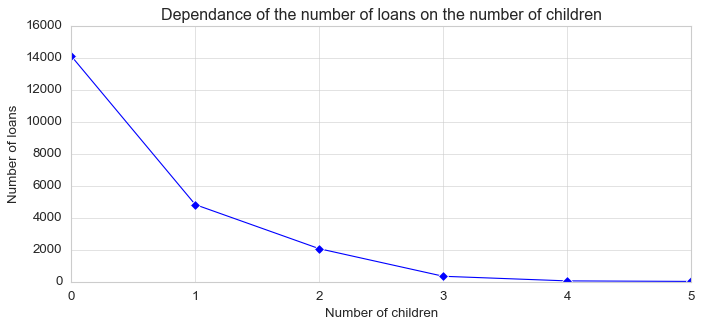

In [26]:
data_ch = data.groupby('children')[['children']].count()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')
plt.title('Dependance of the number of loans on the number of children')
plt.xlabel('Number of children')
plt.ylabel('Number of loans')
plt.show()

In [18]:
children_debt = data.pivot_table(index=['children'], values='debt', \
                                 aggfunc=['count', 'sum', 'mean']).reset_index()
children_debt.columns = ['children', 'clients', 'debt', 'debt_percantage']
children_debt['debt_percantage'] = round(children_debt['debt_percantage'] * 100, 2) 
children_debt = children_debt.sort_values(by='debt_percantage', ascending=False)
children_debt

,children,clients,debt,debt_percantage
4,4,41,4,9.76
2,2,2052,194,9.45
1,1,4808,444,9.23
3,3,330,27,8.18
0,0,14091,1063,7.54
5,5,9,0,0.00


The percentage of debtors ranges from 7.5% to 9.8%. The spread of values is insignificant.

The sample is not balanced, classes in the sample have different sizes.

Large families: People with 5 and 4 children can be excluded from the sample: there is not enough data for these groups. For this group of clients, factors such as marital status and annual family income will be more important.

In the other groups the gap is small, ranging from 9.45% to 7.45%. If we take the difference in the percentage of debtors to be significant, we can conclude that borrowers without children are the most reliable and clients with two children are the least reliable.

Nevertheless, we should take into account the possibility that the loan portfolio of childless borrowers (with several years of loans) is likely to deteriorate in terms of repayment over time (some part of childless borrowers will have children).

### The correlation between income and education

Does education affects income and debt?

In [29]:
data['debt'] = data['debt'].apply(lambda x: 'pays late' if x == 1 else 'pays in time')

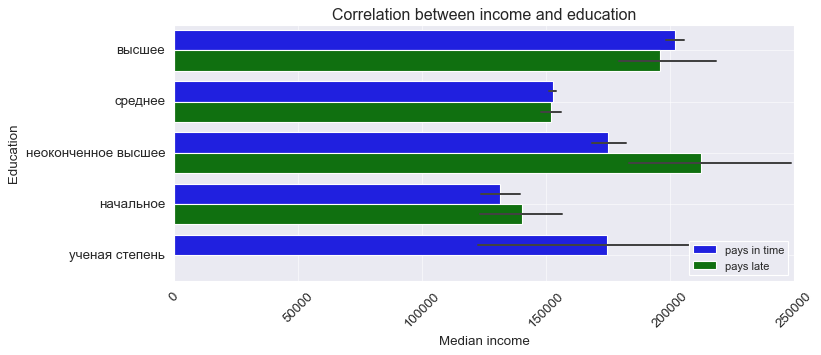

In [31]:
data_ed = data.groupby(['education', 'debt'],\
                       as_index=False)[['total_income']].median()
sns.set_style('dark')
plt.figure(figsize=(10, 4))
sns.barplot(x='total_income', y='education', data=data, hue='debt')
plt.title('Correlation between income and education')
plt.xlabel('Median income')
plt.ylabel('Education')
plt.xticks(rotation=45)
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

People with higher and primary education have outstanding payments. However, people with degrees pay in time.

### Family Status

In [19]:
data.loc[data['family_status'] == 'вдовец / вдова', 'family_status'] = 'в разводе / вдовцы'
data.loc[data['family_status'] == 'в разводе', 'family_status'] = 'в разводе / вдовцы'

family_status_debt = data.pivot_table(index=['family_status'], values = 'debt', \
                                      aggfunc=['count', 'sum', 'mean']).reset_index()
family_status_debt.columns = ['family_status', 'clients', 'debt', 'debt_percantage']
family_status_debt['debt_percantage'] = round(family_status_debt['debt_percantage'] * 100, 2)
family_status_debt = family_status_debt.sort_values(by='debt_percantage', ascending=False)
family_status_debt

,family_status,clients,debt,debt_percantage
0,Не женат / не замужем,2796,273,9.76
2,гражданский брак,4134,385,9.31
3,женат / замужем,12261,927,7.56
1,в разводе / вдовцы,2140,147,6.87


According to the data, the credit department should be cautious with clients who are or have been unmarried. Such clients are less responsible. It appears that legitimized relationships (including ex-relationships) lead to a more responsible attitude towards their obligations.

### Income category

Let's visualize the income distribution among clients

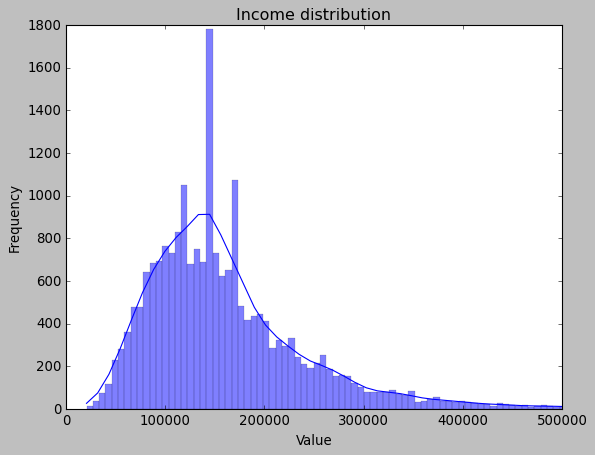

In [23]:
plt.style.use('classic')
sns.histplot(x='total_income', data=data, kde=True)
plt.xlim(0, 500000)
plt.title('Income distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [20]:
total_income_debt = data.pivot_table(index=['total_income_category'], values='debt', \
                                     aggfunc=['count', 'sum', 'mean']).reset_index()
total_income_debt.columns = ['category', 'clients', 'debt', 'debt_percantage']
total_income_debt['debt_percantage'] = round(total_income_debt['debt_percantage'] * 100, 2) 
total_income_debt = total_income_debt.sort_values(by='debt_percantage', ascending=False)
total_income_debt

,category,clients,debt,debt_percantage
4,E,22,2,9.09
2,C,15921,1353,8.50
0,A,25,2,8.00
1,B,5014,354,7.06
3,D,349,21,6.02


**Category A and E.** Clients in these categories are the least likely to take out loans, so there is insufficient data. At the same time, clients in category E have the highest percentage of arrears, and when deciding on these clients, special attention should be paid to factors such as marital status, presence/absence of children and purpose of the loan.

**Category D.** Clients in this category have the smallest percentage of debts, but at the same time it is one of the smallest groups. It is difficult to draw conclusions based on data from 349 clients.

**Category B.** Clients in this group appear to be the most reliable. There are a good number of clients in this category, and the percentage of arrears is lower than in the other three groups.

**Category C.** Clients in this category are the most unreliable. It is the most numerous group and at the same time has the highest percentage of arrears (not including the small category E).

We should remembered that there were many gaps (2174) in the `total_income` column, which we filled with the median value according to the type of employment. Perhaps, the table of correlation between income level and loan repayment at maturity could have looked different if it were not for the missing data.

### Loan purpose

In [21]:
purpose_category_debt = data.pivot_table(index=['purpose_category'], values='debt', \
                                         aggfunc=['count', 'sum', 'mean']).reset_index()
purpose_category_debt.columns = ['category', 'clients', 'debt', 'debt_percantage']
purpose_category_debt['debt_percantage'] = round(purpose_category_debt['debt_percantage'] \
                                                 * 100, 2)
purpose_category_debt = purpose_category_debt.sort_values(by='debt_percantage', ascending=False)
purpose_category_debt

,category,clients,debt,debt_percantage
0,операции с автомобилем,4279,400,9.35
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91
1,операции с недвижимостью,10751,780,7.26


The most risky are loans for automobile operations: this is the second largest group in terms of number of clients and the highest percentage of indebtedness.

Education loans also appear to be risky. The percentage of indebtedness in this group is as high as in the group "operations with automobile" - 9.3%.

The least risky are loans issued for real estate operations: this is the most numerous group and the percentage of indebtedness is the smallest.

## Overall conclusion

We have conducted a study on the reliability of bank borrowers. The purpose of the study is to find out whether there is any correlation between the fact of repayment of the loan on time and such factors as marital status of the client, number of children, income level and purpose of obtaining the loan. The study utilized data on 21'525 customers provided by the bank.

The following hypotheses were put forward:
1. there is a correlation between the number of children and loan repayment on time;
2. there is a correlation between the marital status of the client and loan repayment on time;
3. there is a correlation between the client's income level and loan repayment in due time;
4. there is a correlation between the purpose of obtaining the loan and repayment of the loan at maturity.

We tested each of the hypotheses and came to the following conclusions.

1. There is a relationship between number of children and loan repayment on time.

A relationship was found between the number of children a customer has and repayment of loan on time:
- 0 children - the percentage of debtors in this group was 7.54%;
- 1 child - the percentage of debtors was 9.23%;
- 2 children - the percentage of debtors was 9.45%;
- 3 children - the percentage of debtors was 8.18%;
- 4 children - percentage of debtors 9.75%;
- 5 children - debtor percentage 0%.

It should be noted that large families with 4 and 5 children should be excluded from the sample - there is not enough data for conclusions. For this group of clients such factors as family status and annual income of the client will be more important.

The results for the other groups show that the most reliable clients are clients without children. The most unreliable are clients with two children.

Obviously, the presence of children is not the strongest factor affecting the solvency of clients. It is necessary to collect more data on large families and combine the results of this study with studies on other factors.

2. There is a relationship between the marital status of the client and repayment of the loan on time.

The hypothesis was confirmed: there is a correlation between the marital status of the client and the fact of repayment of the loan on time:
- Not married / not married - percentage of debtors 9.8%;
- Civil marriage - percentage of debtors 9.3%;
- Married / married - percentage of debtors 7.6%;
- Divorced / widowed - percentage of debtors 6.9%.

The smallest percentage of debtors is in the "divorced / widowed" group, but this group is also the smallest, so we cannot conclude that borrowers from this group are the most reliable.

The most reliable borrowers are people belonging to the "married/married" category: this group includes the largest number of bank clients, while the percentage of debtors in this group is the smallest (excluding the "divorced/widowed" group).

The most unreliable borrowers are people who are not in a formal relationship. The highest percentage of debtors in the "Not married / not married" group is 9.8%.

3. there is a correlation between the level of client's income and repayment of the loan on time

The following correlation was found between client's income level and loan repayment on time:
- Category A (1mn and above) - 8.0%;
- Category B (200'000 - 1mn) - 7.1%;
- Category C (50'000 - 200'000) - 8.5%;
- Category D (30'000 - 50'000) - 6.0%;
- Category E (0 - 30'000) - 9.1%.

We do not have enough data for Group "A", "D" and "E" customers to draw a definitive conclusion. At the same time, categories "A" and "E" have a high percentage of arrears. When considering clients of this group, attention should be paid to such related factors as marital status, presence/absence of children, purpose of the loan.

The most reliable are clients of category "B": a sufficient number of clients belong to this group and the percentage of debts is lower than in the other three groups.

The most unreliable are clients belonging to category "C": this is the largest group, and the percentage of arrears here is the highest - 8.5%.

4. There is a relationship between the purpose of obtaining a loan and repayment of the loan on time.

The hypothesis was confirmed. The following correlation was revealed:
- automobile operations - 9.3%;
- getting education - 9.3%;
- wedding - 7.9%;
- real estate transactions - 7.3%.

The most risky are loans issued for automobile operations and education.
The most reliable are loans made for real estate transactions.

**Conclusion**
The results of testing hypotheses 2 and 4 are indicative and can be used to build a credit scoring model.

More data should be collected for more accurate conclusions on hypotheses 1 and 2.